<a href="https://colab.research.google.com/github/dipayandas97/Blob-detection-/blob/master/Kalman_Filter_on_Mouse_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.set_printoptions(threshold=3)
np.set_printoptions(suppress=True)
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [0]:
def prediction(X_hat_t_1,P_t_1,F_t,B_t,U_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)+(B_t.dot(U_t).reshape(B_t.shape[0],-1) )
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    

In [0]:
def update(X_hat_t,P_t,Z_t,R_t,H_t):
    
    K_prime=P_t.dot(H_t.transpose()).dot( np.linalg.inv ( H_t.dot(P_t).dot(H_t.transpose()) +R_t ) )  
    #print("K:\n",K_prime)
    
    X_t=X_hat_t+K_prime.dot(Z_t-H_t.dot(X_hat_t))
    P_t=P_t-K_prime.dot(H_t).dot(P_t)
    
    return X_t,P_t

In [69]:
acceleration=0
delta_t=0.05 #milisecond

F_t=np.array([ [1 ,0,delta_t,0] , [0,1,0,delta_t] , [0,0,1,0] , [0,0,0,1] ])
 
#Initial State cov
P_t= np.identity(4)*0.2
 
#Process cov
Q_t= np.identity(4)
 
#Control matrix
B_t=np.array( [ [0] , [0], [0] , [0] ])
 
#Control vector
U_t=acceleration
 
#Measurment Matrix
H_t = np.array([ [1, 0, 0, 0], [ 0, 1, 0, 0]])
 
#Measurment cov
R_t= np.identity(2)*5
 
# Initial State
X_hat_t = np.array( [[0],[0],[0],[0]] )


print("X_hat_t",X_hat_t.shape)
print("P_t",P_t.shape)
print("F_t",F_t.shape)
print("B_t",B_t.shape)
print("Q_t",Q_t.shape)
print("R_t",R_t.shape)
print("H_t",H_t.shape)

X_hat_t (4, 1)
P_t (4, 4)
F_t (4, 4)
B_t (4, 1)
Q_t (4, 4)
R_t (2, 2)
H_t (2, 4)


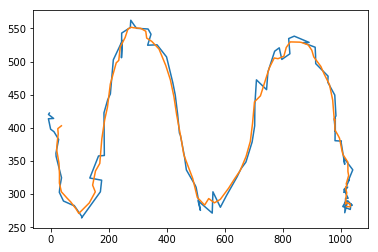

In [75]:
pred = []
measurements = np.array([[0, 423], [0, 423], [0, 423], [0, 423], [0, 422], [5, 398], [12, 373], [15, 360], [19, 347], [25, 329], [34, 307], [37, 300], [43, 293], [61, 280], [80, 273], [98, 271], [127, 281], [145, 298], [162, 322], [166, 337], [171, 353], [178, 376], [187, 401], [200, 438], [210, 474], [223, 502], [231, 513], [242, 526], [251, 539], [265, 548], [278, 553], [290, 554], [303, 554], [325, 554], [347, 551], [353, 545], [365, 532], [388, 500], [410, 472], [418, 458], [426, 437], [437, 412], [447, 382], [463, 355], [477, 327], [496, 302], [505, 293], [515, 287], [531, 285], [547, 284], [570, 284], [591, 288], [621, 303], [641, 320], [656, 342], [673, 371], [688, 392], [695, 409], [708, 429], [722, 447], [744, 472], [765, 492], [780, 505], [787, 511], [804, 524], [824, 536], [837, 537], [853, 538], [869, 538], [880, 534], [897, 522], [911, 510], [923, 500], [936, 483], [950, 465], [961, 449], [967, 437], [973, 424], [978, 413], [984, 400], [989, 389], [997, 376], [1002, 366], [1010, 356], [1014, 347], [1018, 338], [1023, 332], [1023, 323], [1023, 312], [1023, 307], [1023, 304], [1023, 297], [1023, 289], [1023, 286], [1023, 283], [1023, 283], [1023, 283], [1023, 283], [1023, 283], [1023, 283]],dtype='float64').reshape(-1,2)
measurements += 10*np.random.randn(measurements.shape[0],measurements.shape[1])

for i in range(measurements.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    pred.append(X_hat_t)

    Z_t=measurements[i].transpose()
    Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t

pred = np.array(pred)

plt.plot(measurements[:,0],measurements[:,1])
plt.plot(pred[5:,0],pred[5:,1])
plt.show()



In [53]:
100*np.random.randn()


27.97843809955997